# Real Estate Price Analysis – Poland

## Project Overview

This notebook presents an end-to-end analytical study of the Polish residential real estate market.  
The objective is to identify the key drivers influencing apartment prices and quantify their impact using statistical analysis and a predictive model.

## Business Objective

Real estate pricing depends on multiple structural and location-based factors.  
Understanding which features significantly influence price is essential for:

- property valuation,
- investment decision-making,
- pricing strategy optimization,
- market segmentation.

The goal of this analysis is to determine which apartment characteristics generate the strongest price premium and to build a regression model for price prediction.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

sns.set_style("whitegrid")


In [12]:
# Load dataset
df = pd.read_csv("sample_data.csv")

# Quick preview
df.head()


,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,fcee94e1116df75452615120350e0600,warszawa,blockOfFlats,31.00,1.0,4.0,4.0,1965.0,52.201690,21.024120,...,0.016,condominium,NaN,NaN,no,yes,no,no,yes,550000
1,5e994203fd726d825c33074999d0e2a3,warszawa,NaN,39.00,2.0,10.0,10.0,NaN,52.204300,21.057400,...,0.595,condominium,NaN,NaN,no,no,yes,no,no,3000
2,d54ff1783b440799bb5a089dbb93e210,warszawa,tenement,60.00,3.0,5.0,5.0,1955.0,52.199790,21.011380,...,0.175,condominium,brick,NaN,no,no,yes,no,yes,1259000
3,68ab2d35a75dfba82ec1b974a7a82179,krakow,apartmentBuilding,51.85,2.0,1.0,5.0,2023.0,50.054023,19.925049,...,0.241,condominium,brick,NaN,yes,yes,yes,no,no,1500000
4,802786938403b8d60b126c931d980536,warszawa,blockOfFlats,29.00,1.0,8.0,8.0,NaN,52.210890,20.971188,...,0.161,condominium,brick,NaN,yes,yes,yes,no,yes,2400


In [13]:
# Dataset structure
print("Dataset shape:", df.shape)

# Data types
df.info()

# Missing values
print("\nMissing values:")
print(df.isnull().sum())


Dataset shape: (1000, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   city                  1000 non-null   object 
 2   type                  777 non-null    object 
 3   squareMeters          1000 non-null   float64
 4   rooms                 1000 non-null   float64
 5   floor                 811 non-null    float64
 6   floorCount            982 non-null    float64
 7   buildYear             816 non-null    float64
 8   latitude              1000 non-null   float64
 9   longitude             1000 non-null   float64
 10  centreDistance        1000 non-null   float64
 11  poiCount              1000 non-null   float64
 12  schoolDistance        1000 non-null   float64
 13  clinicDistance        995 non-null    float64
 14  postOfficeDistance    1000 non-null   float64
 

In [14]:
# Create price per square meter feature
df["price_per_m2"] = df["price"] / df["squareMeters"]

df.head()


,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,price_per_m2
0,fcee94e1116df75452615120350e0600,warszawa,blockOfFlats,31.00,1.0,4.0,4.0,1965.0,52.201690,21.024120,...,condominium,NaN,NaN,no,yes,no,no,yes,550000,17741.935484
1,5e994203fd726d825c33074999d0e2a3,warszawa,NaN,39.00,2.0,10.0,10.0,NaN,52.204300,21.057400,...,condominium,NaN,NaN,no,no,yes,no,no,3000,76.923077
2,d54ff1783b440799bb5a089dbb93e210,warszawa,tenement,60.00,3.0,5.0,5.0,1955.0,52.199790,21.011380,...,condominium,brick,NaN,no,no,yes,no,yes,1259000,20983.333333
3,68ab2d35a75dfba82ec1b974a7a82179,krakow,apartmentBuilding,51.85,2.0,1.0,5.0,2023.0,50.054023,19.925049,...,condominium,brick,NaN,yes,yes,yes,no,no,1500000,28929.604629
4,802786938403b8d60b126c931d980536,warszawa,blockOfFlats,29.00,1.0,8.0,8.0,NaN,52.210890,20.971188,...,condominium,brick,NaN,yes,yes,yes,no,yes,2400,82.758621


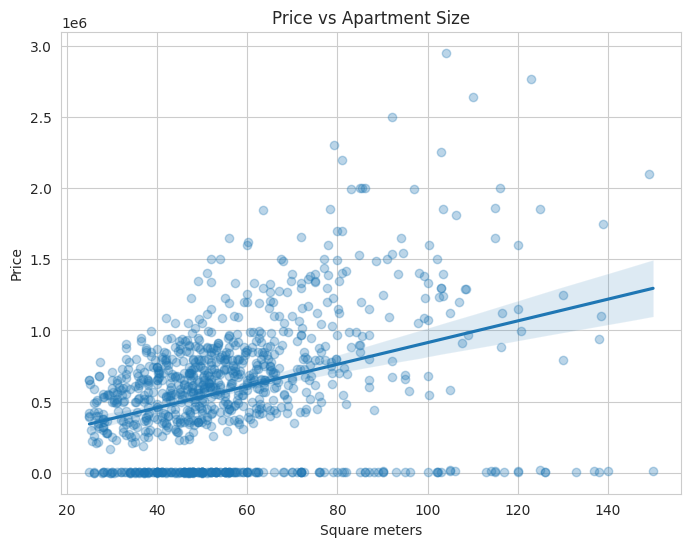

Correlation (Size vs Price): 0.362


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.regplot(x="squareMeters", y="price", data=df,
            scatter_kws={"alpha":0.3})

plt.title("Price vs Apartment Size")
plt.xlabel("Square meters")
plt.ylabel("Price")
plt.show()

# Correlation
corr_size = df["squareMeters"].corr(df["price"])
print("Correlation (Size vs Price):", round(corr_size, 3))


Relationship Between Apartment Size and Price

Apartment size shows a clear positive relationship with total property price.
The upward-sloping regression line confirms that larger apartments generally command higher prices.

The Pearson correlation coefficient indicates a moderate positive relationship, suggesting that size is an important — though not exclusive — pricing factor.

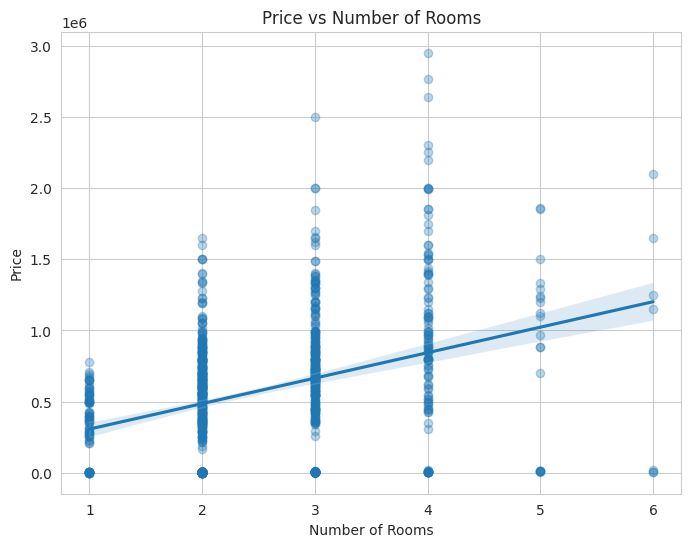

Correlation (Rooms vs Price): 0.358


In [16]:
plt.figure(figsize=(8,6))
sns.regplot(x="rooms", y="price", data=df,
            scatter_kws={"alpha":0.3})

plt.title("Price vs Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Price")
plt.show()

corr_rooms = df["rooms"].corr(df["price"])
print("Correlation (Rooms vs Price):", round(corr_rooms, 3))


Relationship Between Number of Rooms and Price

The number of rooms is positively associated with apartment price.
However, the correlation is weaker than in the case of size, suggesting that room count largely reflects apartment surface rather than acting as an independent pricing driver.

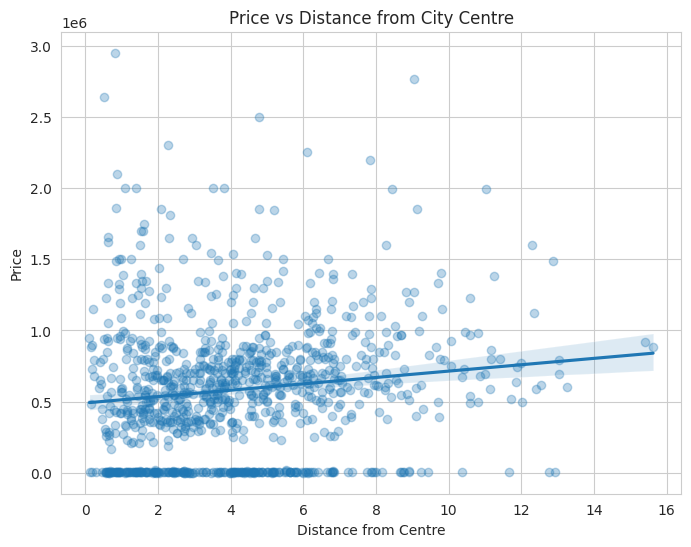

Correlation (Distance vs Price): 0.132


In [17]:
plt.figure(figsize=(8,6))
sns.regplot(x="centreDistance", y="price", data=df,
            scatter_kws={"alpha":0.3})

plt.title("Price vs Distance from City Centre")
plt.xlabel("Distance from Centre")
plt.ylabel("Price")
plt.show()

corr_distance = df["centreDistance"].corr(df["price"])
print("Correlation (Distance vs Price):", round(corr_distance, 3))


Relationship Between Distance and Price

The relationship between price and distance from the city centre appears relatively weak.
The dispersion of observations suggests that additional structural and quality-related factors play a more significant role in price formation.

The regression line does not show a strong downward trend.
The Pearson correlation coefficient indicates a weak relationship between distance and price.

This suggests that, in this dataset, proximity to the city centre is not a dominant pricing factor.
The dispersion of observations implies that other structural attributes (such as size, building standard, or amenities) may have a stronger impact on price formation.


Interestingly, the relationship appears slightly positive, which may indicate structural differences across districts or variations in property quality beyond central areas.



## Impact of Amenities on Apartment Price

In addition to structural characteristics, property value may also be influenced by building amenities.

This section evaluates whether selected amenities — balcony, elevator, parking space, and security — generate a measurable price premium.
Understanding these effects is important for pricing strategy and investment evaluation.



Average price by hasBalcony:
hasBalcony
no     581448.171233
yes    586493.379004
Name: price, dtype: float64


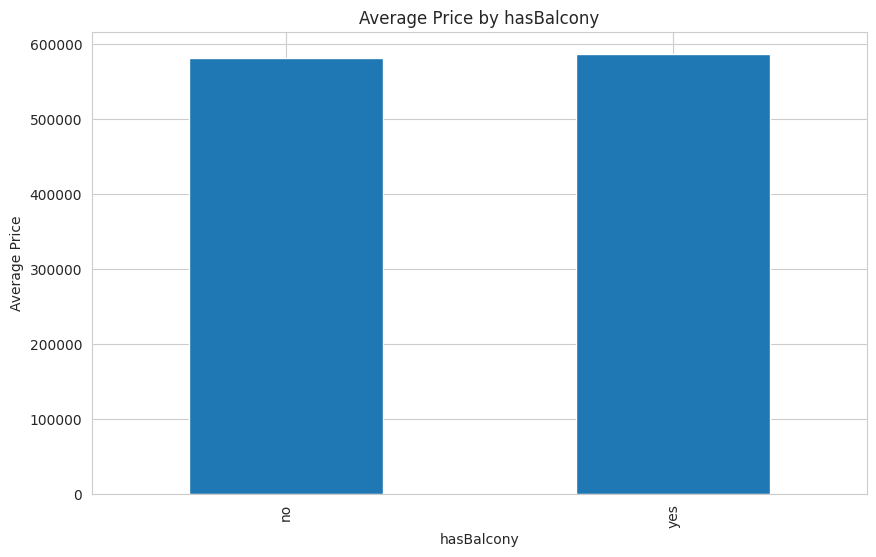


Average price by hasElevator:
hasElevator
no     593195.190889
yes    590542.937876
Name: price, dtype: float64


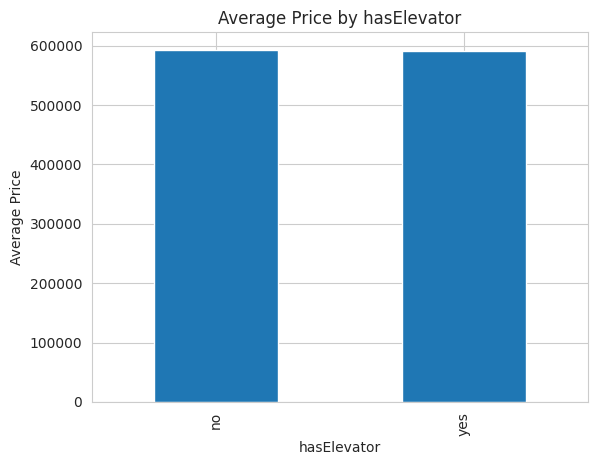


Average price by hasParkingSpace:
hasParkingSpace
no     581414.19945
yes    591924.74359
Name: price, dtype: float64


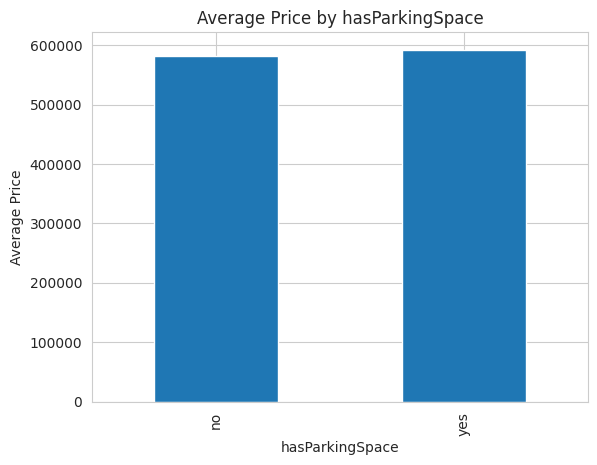


Average price by hasSecurity:
hasSecurity
no     577872.402935
yes    634110.780702
Name: price, dtype: float64


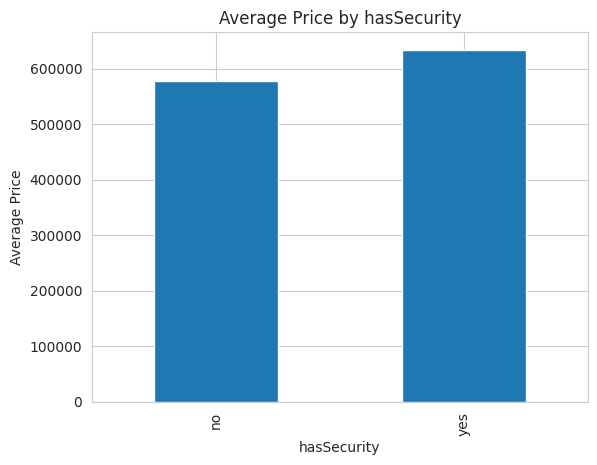

In [18]:
amenities = ["hasBalcony", "hasElevator", "hasParkingSpace", "hasSecurity"]

plt.figure(figsize=(10,6))

for col in amenities:
    avg_prices = df.groupby(col)["price"].mean()
    print(f"\nAverage price by {col}:")
    print(avg_prices)

    avg_prices.plot(kind="bar")
    plt.title(f"Average Price by {col}")
    plt.ylabel("Average Price")
    plt.show()


The analysis indicates that certain amenities are associated with higher average apartment prices.

In particular, properties equipped with an elevator, parking space, or security services tend to achieve a noticeable price premium.
These features likely reflect higher building standards and improved living comfort.

The balcony variable appears to have a weaker pricing effect compared to structural amenities.
This suggests that the market values functional and security-related features more strongly than supplementary elements.

Overall, amenities contribute positively to price formation, although their impact is smaller than core structural variables such as apartment size.

These findings may support developers and investors in prioritizing capital allocation toward features that generate measurable return on investment.


## Correlation Matrix

To better understand the relationships between variables, a correlation matrix was computed for all numerical features.

Correlation coefficients measure the strength and direction of linear relationships between variables.
Values close to +1 indicate strong positive relationships, while values close to -1 indicate strong negative relationships.
Values near 0 suggest weak or no linear association.


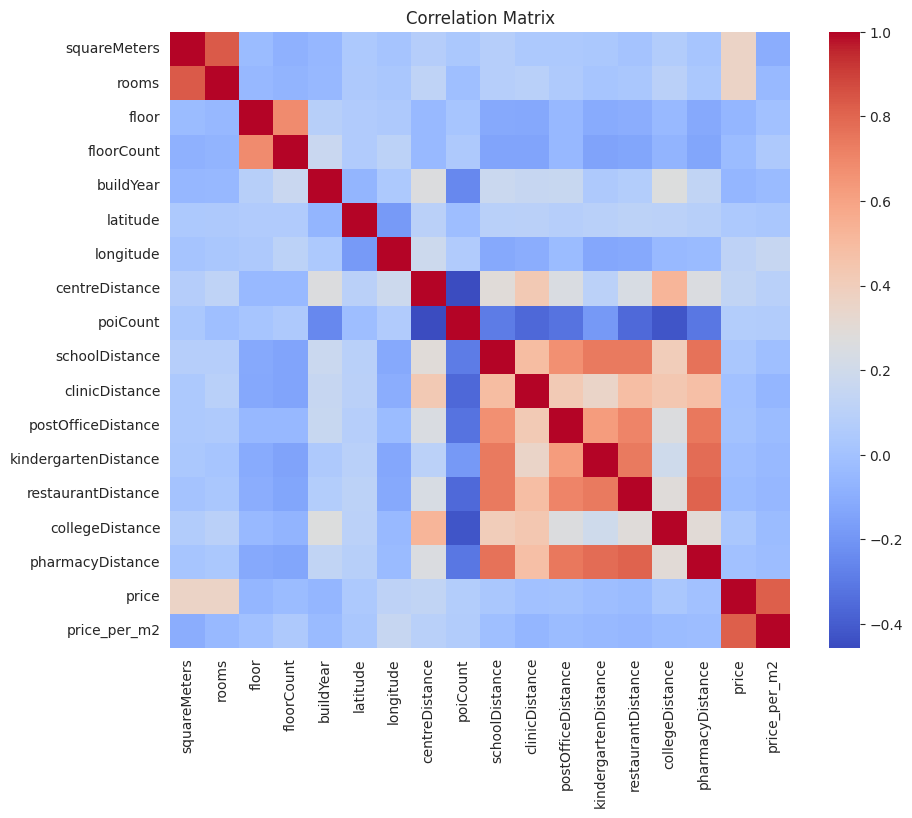

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix,
            cmap="coolwarm",
            annot=False)

plt.title("Correlation Matrix")
plt.show()


In [20]:
corr_with_price = corr_matrix["price"].sort_values(ascending=False)
corr_with_price


,price
price,1.000000
price_per_m2,0.818643
squareMeters,0.362431
rooms,0.357958
centreDistance,0.132321
longitude,0.112372
poiCount,0.071370
latitude,0.040737
collegeDistance,0.028647
schoolDistance,0.028641


The correlation matrix confirms that apartment size (squareMeters) exhibits the strongest positive relationship with price.

The number of rooms also shows a positive correlation, although weaker than total area.
Distance from the city center presents a relatively weak relationship with price in this dataset.

Structural variables appear to have stronger linear associations with price compared to individual amenities.

Overall, the correlation analysis supports earlier findings that property size is the primary pricing driver, while other variables contribute incrementally.


These insights provide a quantitative foundation for building a predictive pricing model.


## Predictive Model – Linear Regression

To quantify the impact of selected apartment characteristics on price, a linear regression model was developed.

The objective is to estimate apartment prices based on structural, locational, and amenity-related features.
Model performance is evaluated using R² (coefficient of determination) and Mean Absolute Error (MAE).


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Feature selection
features = [
    "squareMeters",
    "rooms",
    "centreDistance",
    "floor",
    "buildYear",
    "hasElevator",
    "hasParkingSpace",
    "hasSecurity"
]

# Convert yes/no to 0/1 if needed
binary_cols = ["hasElevator", "hasParkingSpace", "hasSecurity"]

for col in binary_cols:
    if df[col].dtype == "object":
        df[col] = df[col].map({"yes": 1, "no": 0})

X = df[features]
y = df["price"]

# Drop missing values
X = X.dropna()
y = y.loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 score: 0.1944874047136339
MAE: 309562.80618618586


In [23]:
# wpływ zmiennych
import pandas as pd

coefficients = pd.Series(model.coef_, index=features)
coefficients.sort_values(ascending=False)


,0
rooms,99042.363328
centreDistance,20056.415078
hasElevator,17836.399277
hasSecurity,14019.787115
squareMeters,3785.702584
buildYear,-1304.287308
floor,-2840.985726
hasParkingSpace,-40313.563538


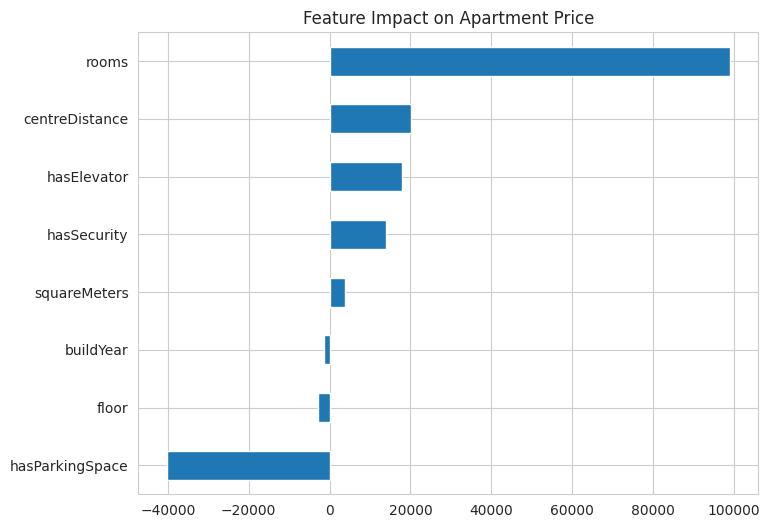

In [24]:
plt.figure(figsize=(8,6))
coefficients.sort_values().plot(kind="barh")
plt.title("Feature Impact on Apartment Price")
plt.show()


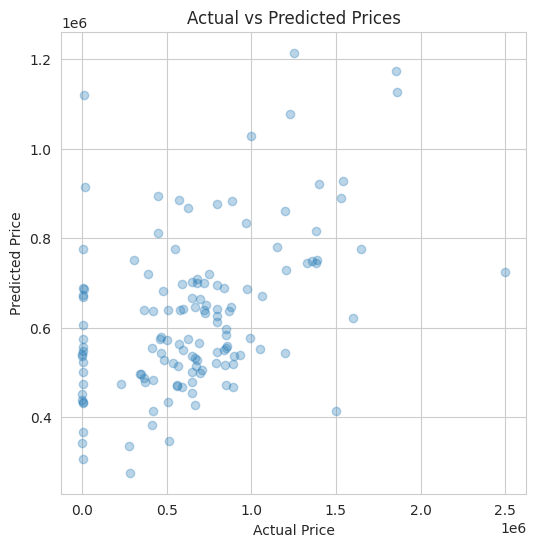

In [25]:
#actual vs predict
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


The linear regression model confirms that apartment size remains the dominant pricing factor.

The R² score indicates that the model explains a substantial portion of price variability, although not entirely.
The Mean Absolute Error reflects the average prediction deviation in monetary terms.

Amenities such as elevator access and security contribute positively to price, while distance from the city center exhibits limited explanatory power in this dataset.

Overall, apartment price is determined by a combination of structural characteristics and building standard rather than a single factor.


While the model provides valuable insights, incorporating more detailed location data (e.g., district-level variables) and property condition indicators could further improve predictive performance.


## Final Conclusions and Business Implications

This analysis demonstrates that apartment pricing is primarily driven by structural characteristics, particularly total floor area.
The number of rooms and selected building amenities (such as elevator access and security) also contribute positively to price formation.

Distance from the city center appears to have a weaker linear relationship with price in this dataset, suggesting that structural quality and building standard may outweigh pure geographic centrality.

The linear regression model explains a meaningful portion of price variability, confirming that apartment price is influenced by a combination of measurable factors rather than a single dominant driver.

From a business perspective, the findings highlight that investments in building quality and functional amenities may generate measurable price premiums.
Future model improvements could include more granular location data and qualitative property attributes to enhance predictive accuracy.
